# Lesson - Working with Dates and Times in Python

We'll be working with the dataset, `potus_visitors_2015.csv`, which only includes visitors who met with the president in 2015. 
`name`: The name of the visitor.
`appt_made_date`: The date and time that the appointment was created.
`appt_start_date`: The date and time that the appointment was scheduled to start.
`appt_end_date`: The date and time that the appointment was scheduled to end.
`visitee_namelast`: The last name of the visitee (the person the visitor was meeting with).
`meeting_room`: The room in which the appointment was scheduled.
`description`: Optional comments added by the WAVES operator.

### Exercise-1: Read Data

Use the `open()` function to open the CSV file `potus_visitors_2015.csv`
Use the `reader()` function to read the opened file.
Use the `list()` function to convert the read file into a list of lists format.
Assign the list of lists to the variable name `potus`.
Remove the first row of the data set, which contains the column names.

In [2]:
from csv import reader
opened_file=open('potus_visitors_2015.csv')
read_file=reader(opened_file)
potus=list(read_file)
potus_header=potus[0]
potus=potus[1:]
print(potus_header)
print(potus[:3])

['name', 'appt_made_date', 'appt_start_date', 'appt_end_date', 'visitee_namelast', 'visitee_namefirst', 'meeting_room', 'description']
[['Joshua T. Blanton', '2014-12-18T00:00:00', '1/6/15 9:30', '1/6/15 23:59', '', 'potus', 'west wing', 'JointService Military Honor Guard'], ['Jack T. Gutting', '2014-12-18T00:00:00', '1/6/15 9:30', '1/6/15 23:59', '', 'potus', 'west wing', 'JointService Military Honor Guard'], ['Bradley T. Guiles', '2014-12-18T00:00:00', '1/6/15 9:30', '1/6/15 23:59', '', 'potus', 'west wing', 'JointService Military Honor Guard']]


### Datetime Module

ython has three standard modules that are designed to help working with dates and times:

The `calendar` module
The `time` module
The `datetime` module

The most useful module for working with data is the `datetime` module. The datetime module contains a number of classes, including:

`datetime.datetime`: For working with date and time data.
`datetime.time`: For working with time data only.
`datetime.timedelta`: For representing time periods.

We can:
Import the whole module by name:
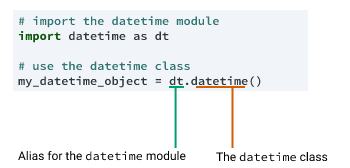

Import definitions via name or wildcard
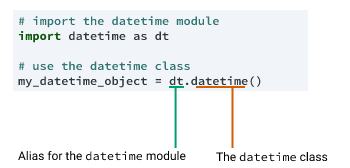

Import whole module by alias
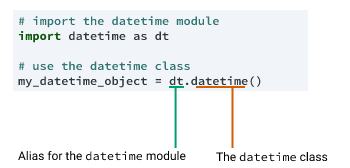



### Datetime Class

The signature of the class is below (with some lesser used parameters omitted):
`datetime.datetime(year, month, day, hour=0, minute=0, second=0)`

The signature indicates that the year, month, and day arguments are required, and the time arguments are optional and set to the equivalent of midnight if omitted. The hour parameter is expressed in 24 hour time, so 11 is 11 a.m., 12 is 12 p.m., 13 is 1 p.m., etc.

Let's look at an example of instantiating (creating) a datetime object. First, we'll import the datetime module and give it the alias `dt`.
`import datetime as dt`

Next, we'll instantiate an object representing January 1, 2000:
```
eg_1 = dt.datetime(2000, 1, 1)
print(eg_1)
```
```
2000-01-01 00:00:00
```

Because we didn't pass any time arguments, the object created represents midnight on the 1st of January, 2000. Let's instantiate a second object, this time with both a date and a time:

```
eg_2 = dt.datetime(1985, 3, 13, 21, 26, 2)
print(eg_2)
```
```
1985-03-13 21:26:02
```

### Exercise-2: Instantiate a Datetime Object

- Import the datetime class using the alias `dt`.
- Instantiate a datetime object representing midnight on June 16, 1911. Assign the object to the variable name `ibm_founded`.
- Instantiate a datetime object representing 8:17 p.m. on July 20, 1969. Assign the object to the variable name `man_on_moon`.

In [3]:
import datetime as dt

ibm_founded = dt.datetime(1911, 6, 16)
man_on_moon = dt.datetime(1969, 7, 20, 20, 17)

### Using `strptime` to parse strings as Dates

Various columns in dataset contain dates and time in various formats: 014-12-18T00:00:00	1/6/15 9:30. 

The `datetime.strptime()` constructor returns a datetime object defined using a special syntax system to describe date and time formats called `strftime`( syntax system). The `strftime` syntax uses a series of format codes consisting of a `%` character followed by a single character which specifies a date or time part in a particular format. As an example, for parsing the date in the string "24/12/1984":
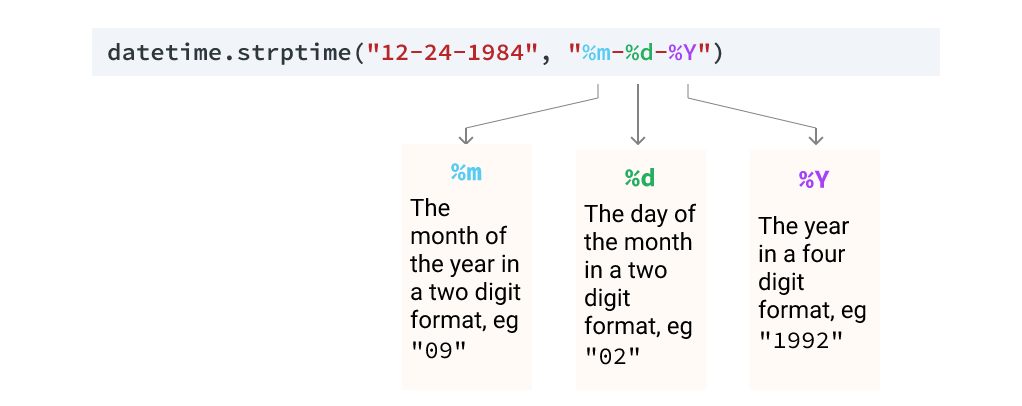

The first argument of the `datetime.strptime()` constructor is the string we want to parse, and the second argument is a string that specifies the format.

The `%d`, `%m`, and `%Y` format codes specify a two-digit day, two-digit month, and four-digit year respectively, and the forward slashes between them specify the forward slashes in the original string. Let's use this example in code:
```
date_1_str = "24/12/1984"
date_1_dt = dt.datetime.strptime(date_1_str, "%d/%m/%Y")
print(type(date_1_dt))
print(date_1_dt)
```
```
class 'datetime.datetime'
1984-12-24 00:00:00
```
We can see that the constructor returns a datetime object. Let's look at another example — "12-24-1984" – the same date, but in our string the date parts are separated using a dash instead of a slash, and the order of the day/month are reversed:
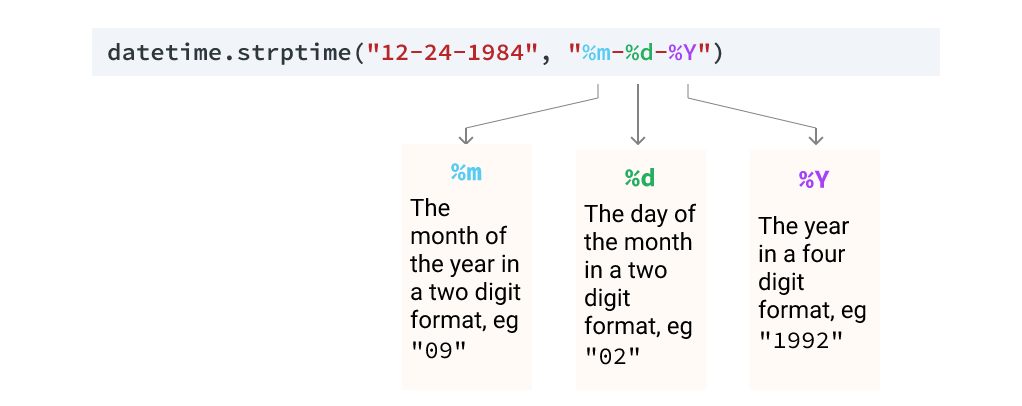

```
date_2_str = "12-24-1984"
date_2_dt = dt.datetime.strptime(date_2_str, "%m-%d-%Y")
print(date_2_dt)
```
```
1984-12-24 00:00:00
```
We can simply look the format up in the relevant section of the [Python documentation](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) when we need them, or we can use the handy micro-site [strftime.org](https://strftime.org/), which contains the same information found in the documentation, but in a slightly easier-to-read format.

**Exercise**
- Create a string date_format that specifies the format of the appt_start_date column:
- The format of the app_start_date column is {month}/{day}/{two digit year} {hour 24hr time}:{minute}.
- Substitute each of the values inside braces with the appropriate strftime code from the table above.
- Iterate over each row in the potus list of lists:
- Assign the appt_start_date column, found at index 2 of each row, to a variable.
- Use the datetime.strptime() constructor to convert the variable from a string to a datetime object, using the date_format string you created earlier.
- Assign the datetime object back to index 2 of the row.

In [4]:
date_format = "%m/%d/%y %H:%M"
for row in potus:
    start_date = row[2]
    start_date = dt.datetime.strptime(start_date, date_format)
    row[2] = start_date

### Using `strftime` to Format Dates

The datetime class has a number of attributes which make it easy to retrieve the various parts that make up the date stored within the object:

`datetime.day`: The day of the month.
`datetime.month`: The month of the year.
`datetime.year`: The year.
`datetime.hour`: The hour of the day.
`datetime.minute`: The minute of the hour.

If we wanted to create string representation of a datetime object representing the date like December 24th, 1984 in the form day/month/year, we could use those attributes to extract the values, and then insert them into a string:
```
dt_object = dt.datetime(1984, 12, 24)
day = dt_object.day
month = dt_object.month
year = dt_object.year
dt_string = "{}/{}/{}".format(day, month, year)
print(dt_string)
```
```
24/12/1984
```
Instead of above, the datetime class has a datetime.strftime() method which will return a string representation of the date using the `strftime` syntax.
With the `strftime()` method we can use `%d`, `%m`, and `%Y` to represent the date, month, and year.

```
dt_object = dt.datetime(1984, 12, 24)
dt_string = dt_object.strftime("%d/%m/%Y")
print(dt_string)
```
```
24/12/1984
```
We can also use `%B` to represent the month as a word.
```
dt_string = dt_object.strftime("%B %d, %Y")
print(dt_string)
```
```
December 24, 1984
```
And we can use `%A`, `%I`, `%M`, and `%p` to represent the day of the week, the hour of the day, the minute of the hour, and a.m./p.m.:
```
dt_string = dt_object.strftime("%A %B %d at %I:%M %p")
print(dt_string)
```


**Exercise**
- Initialize an empty dictionary, `visitors_per_month`.
- Iterate over the rows in the `potus` list of lists. In each iteration:
- Assign the `datetime object` from the `appt_start_date` column (index 2) to a variable.
- Call the` datetime.strftime()` method on the appt_start_date object to create a string in the format `"January, 1901".
- The format code for the name of the month is `%B`
- The format code for a four-digit year is `%Y.`
- If the string is not a key in `visitors_per_month`, add it as a key with a value of 1.
Otherwise, add 1 to the existing value for that key.

In [5]:
visitors_per_month = {}

for row in potus:
    month_dt = row[2]
    month_str = month_dt.strftime("%B, %Y")
    if month_str not in visitors_per_month:
        visitors_per_month[month_str] = 1
    else:
        visitors_per_month[month_str] += 1

### The Time Class
We're going to analyze presidential appointment times. To achieve this, we're going to use the `datetime.time` class. Where the datetime class can hold values for dates and times, the time class holds only time data: hours, minutes, seconds, and microseconds.

The syntax to instantiate a time object is as follows:

```
datetime.time(hour=0, minute=0, second=0, microsecond=0)
```
As the signature indicates, we can instantiate a time object without arguments and it will represent the time "0:00:00" (midnight). Otherwise, we can pass arguments for any or all of the hour, minute and second and microsecond parameters. Let's look at an example for the time 2:30 p.m.:
```
two_thirty = dt.time(14, 30)
print(two_thirty)
```
```
14:30:00
```
We can also create a time object from a datetime object, using the `datetime.datetime.time`() method. This method returns a time object representing the time data from the datetime object.
```
jfk_shot_dt = dt.datetime(1963, 11, 22, 12, 30)
print(jfk_shot_dt)
```
```
1963-11-22 12:30:00
```
```
jfk_shot_t = jfk_shot_dt.time()
print(jfk_shot_t)
```
```
12:30:00
```
The time class doesn't have a `strptime()` constructor, but if we need to parse times in string form, we can use `datetime.strptime()` and then convert directly to a time object:
```
time_str = "8:00"
time_dt = dt.datetime.strptime(time_str,"%H:%M")
print(time_dt)
```
```
1900-01-01 08:00:00
```
```
time_t = time_dt.time()
print(time_t)
```
```
08:00:00
```
Apart from having no strptime constructor, time objects behave similarly to datetime objects:

They have attributes like `time.hour` and `time.second` that wecan use to access individual time components.
They have a `time.strftime()` method, which we can use to create a formatted string representation of the object.


**Exercise**
- Instantiate an empty `appt_times list`.
- Iterate over each row in the potus list of lists. For each iteration:
- Assign the datetime object stored at index value 2 to a variable.
- Create a time object from the datetime object.
-- Append the time object to the appt_times list.

In [6]:
appt_times = []

for row in potus:
    appt_dt = row[2]
    appt_t = appt_dt.time()
    appt_times.append(appt_t)

### Comparing Time Objects

A useful feature of time objects is that they support comparisons. We can test if one time is greater — or later — than another:
```
t1 = dt.time(15, 30)
t2 = dt.time(10, 45)

comparison = t1 > t2
print(comparison)
```
```
True
```
Because these comparison operations are supported, Python built-in functions like `min()` and `max()` can also be used:
```
times = [
           dt.time(23, 30),
           dt.time(14, 45),
           dt.time(8, 0)
        ]

print(min(times))
```
08:00:00
```
```
print(max(times))
```
23:30:00
```


**Exercise**

- Assign the earliest appointment time from the `appt_times list` to the variable `min_time`.
- Assign the latest appointment time from the `appt_times list` to the variable max_time.

In [7]:
min_time = min(appt_times)
max_time = max(appt_times)

### Calculations with Dates and Times

Just like time objects, datetime objects support comparison operators like `>` and `<`. Let's experiment with mathematical operators like `-` and `+` to see if they work too, starting with `+`:
```
dt1 = dt.datetime(2022, 4, 14)
dt2 = dt.datetime(2022, 3, 29)
print(dt1 + dt2)
```
```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
ipython-input-57-d458b47dd193 in module()
      1 dt1 = dt.datetime(2022, 4, 14)
      2 dt2 = dt.datetime(2022, 3, 29)
----> 3 print(d1 + d2)
​
TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'datetime.datetime'
```

Let's try the `-` operator:
```
print(dt1 - dt2)
```
```
16 days, 0:00:00
```
```
diff = dt1 - dt2
print(type(diff))
```
diff = dt1 - dt2
print(type(diff))
```
```class 'datetime.timedelta'
```
The resultant object is a `datetime.timedelta` object. The timedelta type represents a period of time, compared with the other classes we've seen which represent a specific moment in time.
We can also instantiate a timedelta class directly. Let's look at the syntax used for this:
```
datetime.timedelta(days=0, seconds=0, microseconds=0,
                   milliseconds=0, minutes=0, hours=0, weeks=0)
```         
```
two_days = dt.timedelta(2)
print(two_days)
```
```
2 days, 0:00:00
```
```
three_weeks = dt.timedelta(weeks=3)
print(three_weeks)
```
```
21 days, 0:00:00
```
```
one_hr_ten_mins = dt.timedelta(hours=1, minutes=10)
print(one_hr_ten_mins)
```
```
1:10:00
```
We can also use timedelta objects to add or subtract time from datetime objects. Let's look at the example below, where we look to find the date one week from a date object:
```
d1 = dt.date(1963, 2, 21)
d1_plus_1wk = d1 + dt.timedelta(weeks=1)
print(d1_plus_1wk)
```
```
1963-02-28
```
The table below shows some of the different operations that we can make between timedelta and datetime objects.

Operation	Explanation	Resultant Type
`datetime - datetime`	Calculate the time between two specific dates/times	timedelta
`datetime - timedelta`	Subtract a time period from a date or time.	datetime
`datetime + timedelta`	Add a time period to a date or time.	datetime
`timedelta + timedelta`	Add two periods of time together	timedelta
`timedelta - timedelta`	Calculate the difference between two time periods.	timedelta



**Exercise**
- Calculate the time between `dt_2` and `dt_`1 and assign the result to `answer_1`.
- Add 56 days to `dt_3` and assign the result to `answer_2`.
- Subtract 3600 seconds from `dt_4` and assign the result to `answer_3`.

In [8]:
dt_1 = dt.datetime(1981, 1, 31)
dt_2 = dt.datetime(1984, 6, 28)
dt_3 = dt.datetime(2016, 5, 24)
dt_4 = dt.datetime(2001, 1, 1, 8, 24, 13)
answer_1 = dt_2 - dt_1
answer_2 = dt_3 + dt.timedelta(days=56)
answer_3 = dt_4 - dt.timedelta(seconds=3600)

### Summarizing Appointment Lengths

Let's recap how we would calculate the length of a meeting using the start and end times:

```
start_time = dt.datetime(2015, 1, 6, 9, 30)
end_time = dt.datetime(2015, 1, 6, 10, 30)
meeting_length = end_time - start_time
print(meeting_length)
```

```
1:00:00
```
We can use this technique in a loop to calculate the meeting length of each meeting in our White House visitors data set. As an extra analysis step, we'll:

- Create a frequency table of the meeting times.
- Calculate the minimum and maximum value for the appointment lengths.

In order to calculate the minimum and maximum meeting times from our frequency table, we can just use the `min()` and `max()` functions on the dictionary, and they will return the minimum and maximum keys from that dictionary. Let's look at a quick example of this:
```
length_counts = {
                  dt.timedelta(minutes=15): 21,
                  dt.timedelta(hours=3): 1,
                  dt.timedelta(seconds=45): 15
                }
min_length = min(length_counts)
print(min_length)
```
```
0:00:45
```
```
max_length = max(length_counts)
print(max_length)
```
```
3:00:00
```


**Exercise**

Following code converts the `appt_end_date` to datetime objects.

- Instantiate an empty dictionary for our frequency table, `appt_lengths`.
Loop over each row in potus, and:
- Assign the values for `appt_start_date (index 2)` and `appt_end_date (index 3)` to variables.
- Subtract appt_start_date from appt_end_date to calculate the length of the appointment, `length`.
- If `length` is not a key in `appt_lengths`, add it as a key with a value of 1.
- If `length` is a key in appt_lengths, add 1 to the existing value of that key.
- Calculate the minimum key in appt_lengths and assign the result to min_length.
- Calculate the maximum key in appt_lengths and assign the result to max_length.

In [9]:
for row in potus:
    end_date = row[3]
    end_date = dt.datetime.strptime(end_date, "%m/%d/%y %H:%M")
    row[3] = end_date
appt_lengths = {}

for row in potus:
    start_date = row[2]
    end_date = row[3]
    length = end_date - start_date
    if length not in appt_lengths:
        appt_lengths[length] = 1
    else:
        appt_lengths[length] += 1

min_length = min(appt_lengths)
max_length = max(appt_lengths)